<a href="https://colab.research.google.com/github/AmirJlr/Graph-Neural-Networks/blob/master/04-PyG/PyG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation :

In [2]:
import torch

print(torch.__version__)
print(torch.version.cuda)

2.1.0+cu121
12.1


In [3]:
!pip install pyg_lib torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.1.0+cu121.html
!pip install torch_geometric

Looking in links: https://data.pyg.org/whl/torch-2.1.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 122.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 112.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 120.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 932.1/932.1 kB 66.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.8 MB/s eta 0:00:00


## Data Handling of Graphs :
A graph is used to model pairwise relations (edges) between objects (nodes).

**A single graph in PyG is described by an instance of torch_geometric.data.Data**,

which holds the following attributes by default:

- **data.x**: Node feature matrix with **shape [num_nodes, num_node_features]**

- **data.edge_index**: Graph connectivity in COO format with **shape [2, num_edges]** and type torch.long

- **data.edge_attr**: Edge feature matrix with **shape [num_edges, num_edge_features]**

- **data.y**: Target to train against (may have arbitrary shape), e.g., node-level targets of shape [num_nodes, *] or graph-level targets of shape [1, *]

- **data.pos**: Node position matrix with shape [num_nodes, num_dimensions]

In [4]:
import torch
from torch_geometric.data import Data # Graph object
import networkx as nx
from torch_geometric.utils.convert import to_networkx

In [5]:
# a graph with 4 nodes
edge_list = torch.tensor([
                         [0, 0, 0, 1, 2, 2, 3, 3], # Source Nodes
                         [1, 2, 3, 0, 0, 3, 2, 0]  # Target Nodes
                        ], dtype=torch.long)


# 6 Features for each node (4x6 - Number of nodes x NUmber of features)
node_features = torch.tensor([
                            [-8, 1, 5, 8, 2, -3], # Features of Node 0
                            [-1, 0, 2, -3, 0, 1], # Features of Node 1
                            [1, -1, 0, -1, 2, 1], # Features of Node 2
                            [0, 1, 4, -2, 3, 4], # Features of Node 3
                            ],dtype=torch.long)

# 1 Weight for each edge
edge_weight = torch.tensor([
                            [35.], # Weight for nodes (0,1)
                            [48.], # Weight for nodes (0,2)
                            [12.], # Weight for nodes (0,3)
                            [10.], # Weight for nodes (1,0)
                            [70.], # Weight for nodes (2,0)
                            [5.],  # Weight for nodes (2,3)
                            [15.], # Weight for nodes (3,2)
                            [8.],  # Weight for nodes (3,0)
                            ],dtype=torch.long)

In [6]:
Graph = Data(x = node_features, edge_index=edge_list, edge_attr=edge_weight)

In [7]:
Graph

Data(x=[4, 6], edge_index=[2, 8], edge_attr=[8, 1])

In [8]:
Graph_nx = to_networkx(Graph)

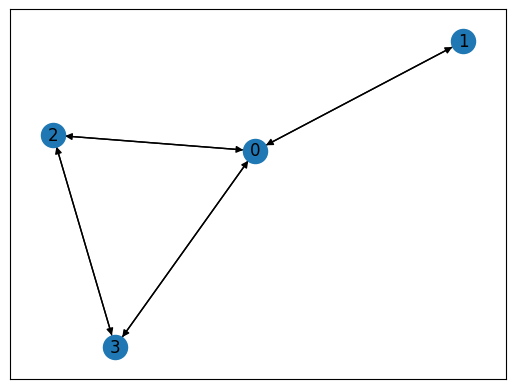

In [10]:
nx.draw_networkx(Graph_nx)

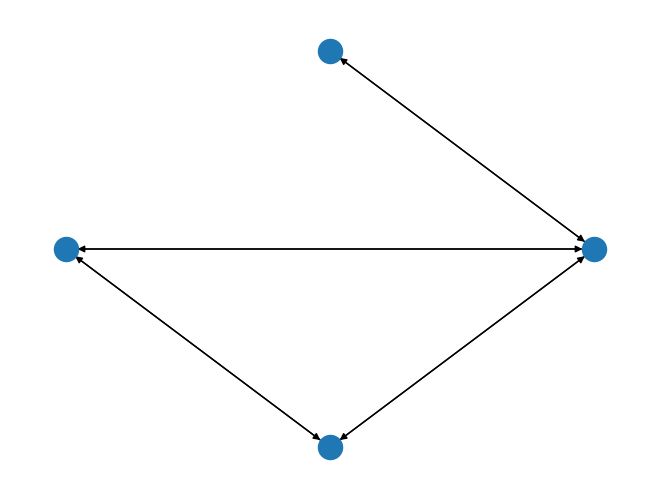

In [11]:
nx.draw_circular(Graph_nx)

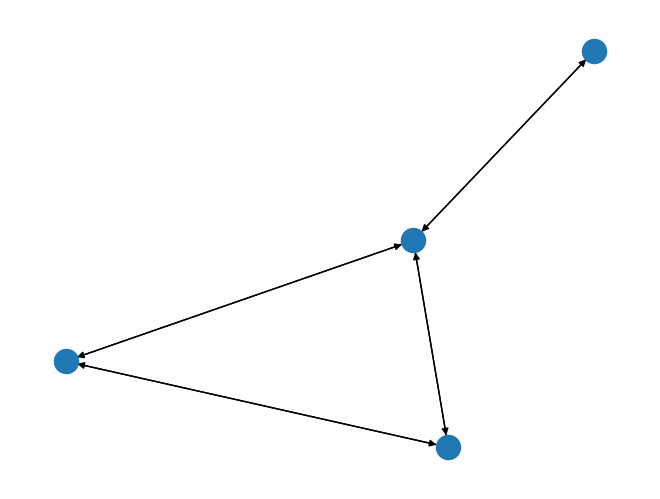

In [12]:
nx.draw_kamada_kawai(Graph_nx)